In [34]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn_qqplot import pplot
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, FamaMacBeth
from patsy import dmatrices

# Question 1
Does the body style variable appear
to be relevant for car prices, above and beyond horsepower?

In [20]:
###***https://archive.ics.uci.edu/ml/datasets/automobile***###
os.chdir('D:\\Quarter_3_Subjects\\Data Analytics\\Homework\\1') #Change directory to where you download the dataset
df = pd.read_csv('imports-85.csv') #Reading dataset
df['log_price'] = np.log(df.price) 
df['price^2'] = df.price*df.price
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,log_price,price^2
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0,9.510075,182115025.0
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0,9.711116,272250000.0
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0,9.711116,272250000.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0,9.543235,194602500.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0,9.767095,304502500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0,9.731809,283754025.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0,9.854560,362712025.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0,9.975110,461605225.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0,10.019936,504900900.0


[Text(0.5, 0, 'Horsepower'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Price VS. Horsepower')]

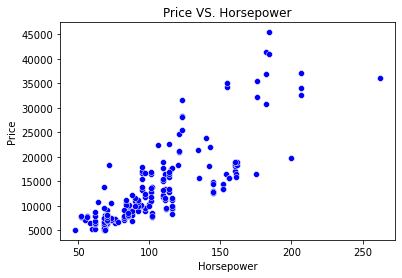

In [21]:
# Scatterplot of Price vs Horsepower
plt.figure()
ax=sns.scatterplot(x     = "horsepower",
                   y     = "price",
                   data  = df,
                   color = "blue" # or "pink", "black", etc. 
                   )
# Add title and axis labels
ax.set(xlabel  = 'Horsepower', 
        ylabel  = 'Price',
        title   = "Price VS. Horsepower") 

We see that price vs horsepower has some heterosedaskicity so try another plot by taking a (price)^2

[Text(0.5, 0, 'Horsepower'),
 Text(0, 0.5, 'Price^2'),
 Text(0.5, 1.0, 'Price^2 VS. Horsepower')]

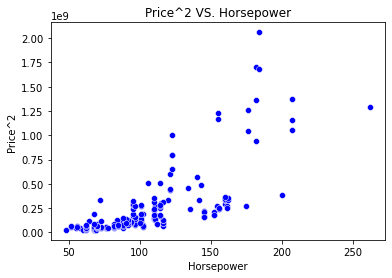

In [22]:
# Scatterplot of  Price^2 vs Horsepower
plt.figure()
ax=sns.scatterplot(x     = "horsepower",
                   y     = "price^2",
                   data  = df,
                   color = "blue" # or "pink", "black", etc. 
                   )
# Add title and axis labels
ax.set(xlabel  = 'Horsepower', 
       ylabel  = 'Price^2',
       title   = "Price^2 VS. Horsepower")

Even still the regression wont give better fitted values. Lets try Log(price)

[Text(0.5, 0, 'Horsepower'),
 Text(0, 0.5, 'Log(Price)'),
 Text(0.5, 1.0, 'Log(Price) VS. Horsepower')]

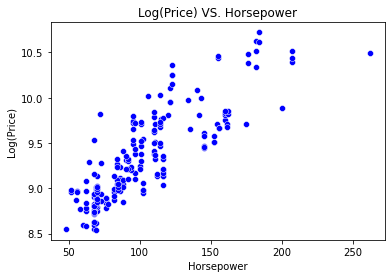

In [23]:
# Scatterplot of Log Price vs Horsepower
plt.figure()
ax=sns.scatterplot(x     = "horsepower",
                   y     = "log_price",
                   data  = df,
                   color = "blue" # or "pink", "black", etc. 
                   )
# Add title and axis labels
ax.set(xlabel  = 'Horsepower', 
       ylabel  = 'Log(Price)',
       title   = "Log(Price) VS. Horsepower")

We see that Log(Price) has less heteroskedeskacity

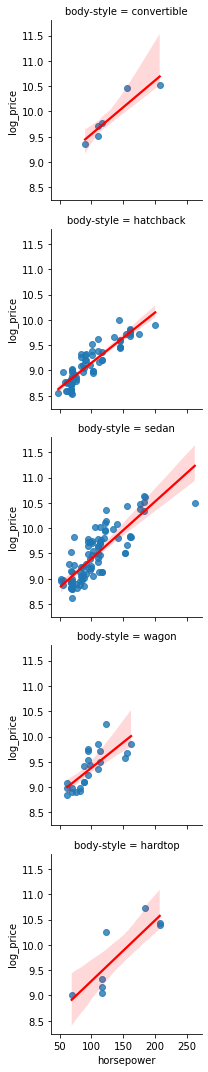

In [24]:
#Plotting Log(Price) vs Horsepower for each body type
ax = sns.FacetGrid(df, row="body-style")
ax.map(sns.regplot, "horsepower", "log_price",line_kws={"color": "red"})

We see form the above plot that body type has some level of predictabiltiy as slope for different body types is slightly different.

In [25]:
#Without body style
a = df[['horsepower','log_price','body-style']].dropna()
y= pd.DataFrame(a.log_price)
# x = a[['horsepower','body-style']]
# x = pd.get_dummies(data=x, drop_first=False)
x = a['horsepower']

x =sm.add_constant(x)
results = sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     446.9
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           1.47e-52
Time:                        22:32:52   Log-Likelihood:                -27.845
No. Observations:                 199   AIC:                             59.69
Df Residuals:                     197   BIC:                             66.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.1949      0.058    140.772      0.0

In [26]:
#With body style
a = df[['horsepower','log_price','body-style']].dropna()
y= pd.DataFrame(a.log_price)
x = a[['horsepower','body-style']]
x = pd.get_dummies(data=x, drop_first=False)

x =sm.add_constant(x)
results = sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.744
Method:                 Least Squares   F-statistic:                     115.9
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           3.55e-56
Time:                        22:33:51   Log-Likelihood:                -7.6882
No. Observations:                 199   AIC:                             27.38
Df Residuals:                     193   BIC:                             47.14
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      6

As R-sqaured has increased along with significant t stats, we see that body style has some predictability along with horsepower

Text(0.5, 1.0, 'Residual VS Fitted')

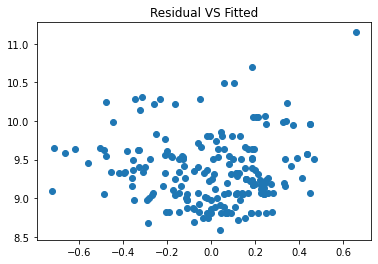

In [27]:
df['residual'] = x.dot(results.params)- df.log_price
df['fitted'] = x.dot(results.params)
plt.scatter(df.residual, df.fitted)
plt.title('Residual VS Fitted')

In [30]:
df['residual'].mean() #Mean of residuals is zero

-1.5353435998836335e-15

Text(0.5, 1.0, 'Residual VS Horsepower')

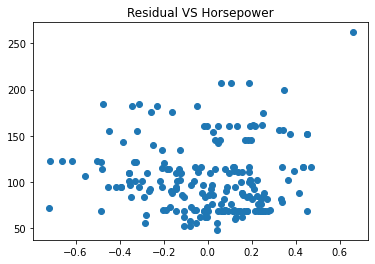

In [31]:
plt.scatter(df.residual,df.horsepower)
plt.title('Residual VS Horsepower')

We see that R square is pretty good and residuals are also uncoorelated to independent variable and to the fitted value. Overall mean of residuals is also zero. That means our predictor model was good and body style does matter in pricing of the car.

# Question 2 
How is Mileage and Horsepower related?

Text(0.5, 1.0, 'Horsepower VS Mileage')

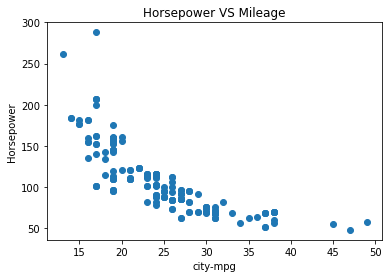

In [32]:
plt.scatter(df['city-mpg'],df['horsepower'])
plt.xlabel('city-mpg')
plt.ylabel('Horsepower')
plt.title('Horsepower VS Mileage')

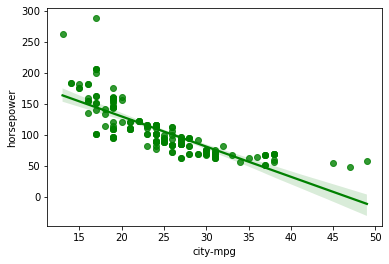

In [16]:
x = df['city-mpg']
y=df['horsepower']
ax = sns.regplot(x=x, y=y,color='g',order =1)

We see that as Horsepower goes down the Mileage is increasing, which makes sense as engines are more efficient rather than performance

In [33]:
a = df[['horsepower','city-mpg']].dropna()
y= a['city-mpg']
x = a['horsepower']
x =sm.add_constant(x)
results = sm.OLS(y,x).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               city-mpg   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     366.5
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           3.49e-47
Time:                        22:40:59   Log-Likelihood:                -564.37
No. Observations:                 203   AIC:                             1133.
Df Residuals:                     201   BIC:                             1139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.1031      0.775     50.482      0.0

We see that Horsepower has a negative coefficient and that is consistent with the conculsion we drawed based on the plot. However, if we do not take a constant then the coefficent comes out to be postive which is counter intutive to the plot conclusion. There is also non-linearity that is visible from the plot.